# Repaso (Módulo 1)
> Recordar que el tema principal del módulo 1 son las ecuaciones diferenciales. Entonces, al finalizar este módulo, las competencias principales que deben tener ustedes es
> - Resolver de forma numérica ecuaciones diferenciales ordinarias (EDO) de cualquier orden.
> - Graficar soluciones de dichas EDO en diferentes representaciones.
> - Interpretar o concluir acerca de las gráficas que se obtuvieron.

___
## Ejemplo 1. Recordemos la ecuación logística.
Un modelo popular de crecimiento poblacional de organismos es la llamada **ecuación lógistica**, publicada por Pierre Verhulst en 1838.

$$\frac{dx}{dt} = \mu(x) \; x = r\; (1- x)\; x.$$

En este modelo, $x$ es una variable que representa *cualitativamente* la población. El valor $x=1$ representa la capacidad máxima de población y el valor $x=0$ representa extinción.

Además, $r$ es la tasa de crecimiento máxima de la población.

### Primer punto
Dibuje $\mu(x)=r(1-x)$ para $r=1$, e interprete su significado.

In [1]:
# Importar librerías
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# Definimos función mu
def mu(x, r):
    return r*(1-x)

In [3]:
# Parámetro r
r = 1
# Vector de población
x = np.linspace(0, 1.1)
# Calculamos valores de mu para x
y = mu(x, r)

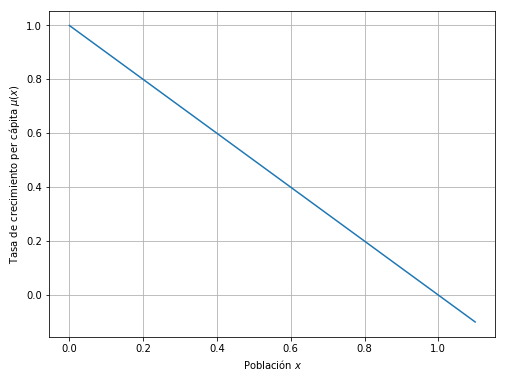

In [4]:
# Gráfica
plt.figure(figsize=(8,6))
plt.plot(x, y)
plt.xlabel('Población $x$')
plt.ylabel('Tasa de crecimiento per cápita $\mu(x)$')
plt.grid()
plt.show()

**Interpretación:**
- La tasa de crecimiento depende de la población. Cuando la población $x$ es cercana a cero, la tasa de crecimiento per cápita $\mu(x)$ es máxima e igual a $r=1$.
- Adicionalmente, cuando la población es máxima $x=1$, la tasa de crecimiento per cápita $\mu(x)$ es igual a cero.
- Cuando hay sobrepoblación $x>1$, la tasa de crecimiento per cápita es negativa.

### Segundo punto
Para $r=1$ y $x(0)=x_0=0.1$ resuelva numéricamente esta ecuación y grafique $x$ vs. $t$. ¿Qué se puede decir de la población cuando $t\to\infty$?

In [5]:
# Importamos función para integración numérica
from scipy.integrate import odeint

In [19]:
# Definimos campo de la ecuación diferencial
def logistica(x, t, r):
    return mu(x, r)*x
# Definimos el parámetro r
r = 1
# Definimos condición inicial
x0 = 0.1
# Definimos el vector de tiempo
t = np.linspace(0, 10)

In [20]:
# solución de la ecuación
x = odeint(logistica, x0, t, args=(r,))

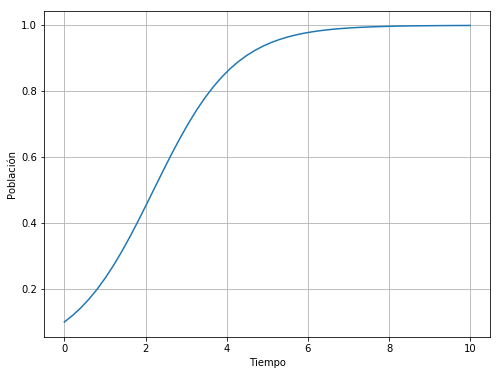

In [21]:
# Gráfica x vx. t
plt.figure(figsize=(8,6))
plt.plot(t, x)
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.grid()
plt.show()

**Conclusión:**
- Cuando $t\to\infty$, podemos observar que $x(t)\to 1$.
- Además, la población no decrece, de hecho, parece que se va a mantener constante en 1, es decir en su capacidad máxima.

### Tercer punto
Haga un barrido de $-1\leq r\leq 1$ con pasos de $0.5$, resolviendo la ecuación logística numéricamente cada vez y graficando los resultados en una misma gráfica. ¿Para qué valores de $r$ se tiene crecimiento de la población? ¿Para qué valores se tiene extinción?

In [25]:
# Vector de parámetros
rr = np.array([-1, -0.5, 0, 0.5, 1])

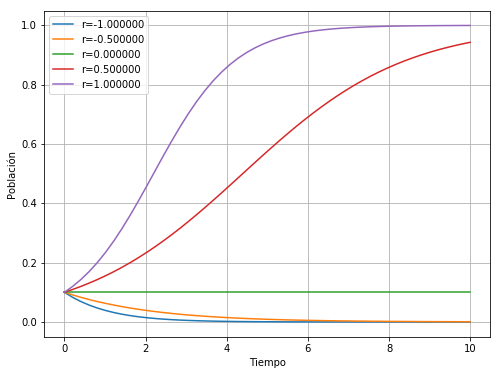

In [28]:
plt.figure(figsize=(8,6))
for r in rr:
    x = odeint(logistica, x0, t, args=(r,))
    plt.plot(t, x, label='r=%f'%r)

plt.xlabel('Tiempo')
plt.ylabel('Población')
#plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.legend(loc='best')
plt.grid()
plt.show()

**Conclusión:**
- Para los valores negativos de $r$, la población se extingue conforme pasa el tiempo.
- Por el contrario, cuando $r$ es positiva, la población llega a su límite (tope, capacidad máxima) conforme pasa el tiempo.
- Cuando $r=0$, la población se mantiene constante en su valor inicial.

___
## Ejemplo 2. Conejos vs. Ovejas.

Imaginemos que en un mismo ecosistema se encuentran conejos y ovejas. Supongamos, además, que ambas compiten por el mismo alimento (hierba) y que la cantidad total de alimento es limitada. Se ignoran otros factores como depredadores, efectos de temporada (estaciones), y otras fuentes de comida. El modelo de competición entre dos especies **Lotka-Volterra** nos sirve para describir este fenómeno.

Dos fenómenos importantes:
- Cada especie crecería hasta su capacidad máxima en ausencia de la otra especie. Esto se puede modelar con la ecuación logística para cada especie. Los conejos tienen una habilidad soprendente para reproducirse, entonces comparativamente deberían crecer más.
- Cuando conejos y ovejas se encuentran, empieza la competencia. Algunas veces los conejos comen, pero las ovejas (al ser más grandes) ganarán el derecho a la comida la mayoría de las veces. Supondremos que dichos conflictos se dan a una tasa proporcional al tamaño de cada población (si hay dos veces más ovejas, la probabilidad de que un conejo encuentre a una oveja será el doble). Supondremos que dicha competencia disminuirá la tasa de crecimiento para cada especie, y el efecto será mayor para los conejos.

Con las consideraciones anteriores, un modelo específico es:

\begin{align}
\frac{dx_1}{dt} &= x_1(3-x_1-2x_2)\\
\frac{dx_2}{dt} &= x_2(2-x_2-x_1),
\end{align}

donde $x_1(t)\geq 0$ es la población de conejos al instante $t$ y $x_2(t)\geq 0$ es la población de ovejas al instante $t$. Definimos $x=\left[x_1\quad x_2\right]^T$.

Esta selección de coeficientes se tiene para recrear el escenario descrito. Sin embargo, este modelo se puede utilizar para estudiar competición entre especies en general y los coeficientes cambiarán en cada caso.

Simule el sistema para cada una de las siguientes condiciones iniciales. Para cada caso, obtenga gráficas de $x_1$ vs. $t$, $x_2$ vs. $t$ y $x_2$ vs. $x_1$. ¿Qué pasa con las poblaciones de conejos y de ovejas cuando $t\to\infty$? ¿Pueden coexistir?

1. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [0.5 \quad 1]^T$.
2. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [1 \quad 0.5]^T$.
3. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [1.5 \quad 1]^T$.
4. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [1 \quad 1.5]^T$.
5. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [1 \quad 1]^T$.

In [29]:
def lotkaVolterra(x, t):
    x1 = x[0]
    x2 = x[1]
    return np.array([x1*(3-x1-2*x2), x2*(2-x2-x1)])

In [53]:
# Primer condición inicial
x0 = np.array([0.5, 1])
# Vector de tiempo
t = np.linspace(0, 20, 100)

In [54]:
# Resolver numéricamente
xx = odeint(lotkaVolterra, x0, t)
# Separamos soluciones
x1 = xx[:, 0]
x2 = xx[:, 1]

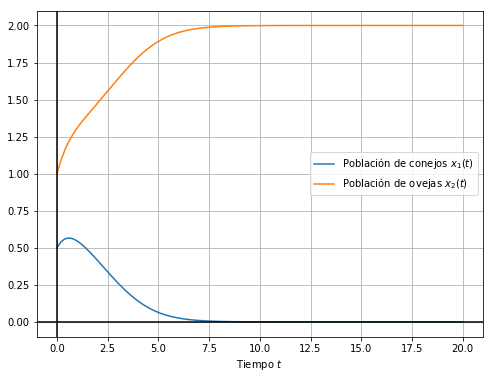

In [55]:
# Gráficas de x1 vs. t y x2 vs. t
plt.figure(figsize=(8,6))
plt.plot(t, x1, label='Población de conejos $x_1(t)$')
plt.plot(t, x2, label='Población de ovejas $x_2(t)$')
plt.xlabel('Tiempo $t$')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc='best')
plt.grid()
plt.show()

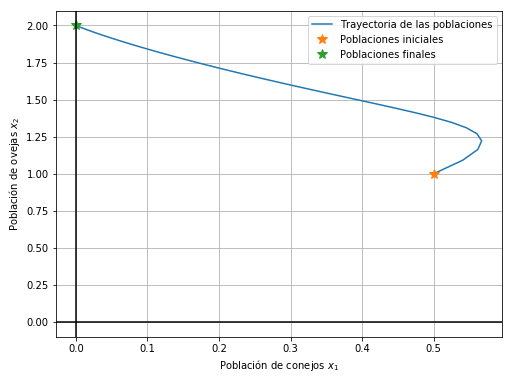

In [56]:
plt.figure(figsize=(8,6))
plt.plot(x1, x2, label='Trayectoria de las poblaciones')
plt.plot(x1[0], x2[0], '*', ms=10, label = 'Poblaciones iniciales')
plt.plot(x1[-1], x2[-1], '*', ms=10, label = 'Poblaciones finales')
plt.xlabel('Población de conejos $x_1$')
plt.ylabel('Población de ovejas $x_2$')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend(loc = 'best')
plt.grid()
plt.show()

**Conclusión:**
- Cuando $t\to\infty$, la población de los conejos se extingue ($x_1(t)\to0$), mientras que la población de ovejas llega a su capacidad máxima ($x_2(t)\to 2$).
- Lo anterior evidencia que bajo las poblaciones iniciales seleccionadas, estas especies no pueden coexistir.

Referencia:
- Strogatz, Steven. *NONLINEAR DYNAMICS AND CHAOS*, ISBN: 9780813349107, (eBook disponible en biblioteca).

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>